In [339]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import math 
from datetime import timedelta

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import requests




In [340]:
ergast_base = "http://ergast.com/api/f1"
year = 2022
calendar_url = f'{ergast_base}/{year}.json'
calendar_response = requests.get(calendar_url).json()

grandprixs = calendar_response['MRData']['RaceTable']['Races']

gp_index = []

table_data = []
for gps in grandprixs:
    gp_round = gps['round']
    gp_index.append(gp_round)
    gp_name = gps['raceName']
    gp_circuit = gps['Circuit']['circuitName']
    gp_date = gps['date']
    gp_country = gps['Circuit']['Location']['country']
    gp_locality = gps['Circuit']['Location']['locality']
    table_data.append([gp_round, gp_name, gp_circuit, gp_date, gp_locality, gp_country])

calendar = pd.DataFrame(table_data, columns=['Round', 'Grand Prix', 'Circuit Name', 'Date', 'Location', 'Country'])
calendar.set_index('Round', inplace=True)
calendar

,Grand Prix,Circuit Name,Date,Location,Country
Round,,,,,
1,Bahrain Grand Prix,Bahrain International Circuit,2022-03-20,Sakhir,Bahrain
2,Saudi Arabian Grand Prix,Jeddah Corniche Circuit,2022-03-27,Jeddah,Saudi Arabia
3,Australian Grand Prix,Albert Park Grand Prix Circuit,2022-04-10,Melbourne,Australia
4,Emilia Romagna Grand Prix,Autodromo Enzo e Dino Ferrari,2022-04-24,Imola,Italy
5,Miami Grand Prix,Miami International Autodrome,2022-05-08,Miami,USA
6,Spanish Grand Prix,Circuit de Barcelona-Catalunya,2022-05-22,Montmeló,Spain
7,Monaco Grand Prix,Circuit de Monaco,2022-05-29,Monte-Carlo,Monaco
8,Azerbaijan Grand Prix,Baku City Circuit,2022-06-12,Baku,Azerbaijan
9,Canadian Grand Prix,Circuit Gilles Villeneuve,2022-06-19,Montreal,Canada


DRIVERS LIST

In [341]:
drivers_url = f'{ergast_base}/{year}/drivers.json'

drivers_response = requests.get(drivers_url).json()

drivers_data = drivers_response['MRData']['DriverTable']['Drivers']

driver_list = []
for driver in drivers_data:
    driver_code = driver['code']
    driver_fname = driver['givenName']
    driver_lname = driver['familyName']
    driver_nationality = driver['nationality']
    driver_number = driver['permanentNumber']
    driver_dob = driver['dateOfBirth']
    driver_fullname = driver_fname+" "+driver_lname
    driver_list.append([driver_code, driver_fullname, driver_nationality,driver_number,driver_dob])

drivers = pd.DataFrame(driver_list, columns=["Abbreviations","Driver Name","Nationality","Driver Number","Driver DOB" ])

drivers.set_index("Abbreviations", inplace=True)
drivers



,Driver Name,Nationality,Driver Number,Driver DOB
Abbreviations,,,,
ALB,Alexander Albon,Thai,23,1996-03-23
ALO,Fernando Alonso,Spanish,14,1981-07-29
BOT,Valtteri Bottas,Finnish,77,1989-08-28
DEV,Nyck de Vries,Dutch,21,1995-02-06
GAS,Pierre Gasly,French,10,1996-02-07
HAM,Lewis Hamilton,British,44,1985-01-07
HUL,Nico Hülkenberg,German,27,1987-08-19
LAT,Nicholas Latifi,Canadian,6,1995-06-29
LEC,Charles Leclerc,Monegasque,16,1997-10-16


TEAMS

In [342]:
teams_url = f'{ergast_base}/{year}/constructors.json'

teams_response = requests.get(teams_url).json()

teams_data = teams_response['MRData']['ConstructorTable']['Constructors']
team_list = []
for team in teams_data:
    team_name = team['name']
    team_nationality = team['nationality']
    team_list.append([team_name,team_nationality])

teams = pd.DataFrame(team_list,columns=["Team Name","Nationality"])
  
teams


,Team Name,Nationality
0,Alfa Romeo,Swiss
1,AlphaTauri,Italian
2,Alpine F1 Team,French
3,Aston Martin,British
4,Ferrari,Italian
5,Haas F1 Team,American
6,McLaren,British
7,Mercedes,German
8,Red Bull,Austrian
9,Williams,British


In [343]:
driver_standings_url = f'{ergast_base}/{year}/driverstandings.json'
driver_standings_response = requests.get(driver_standings_url).json()

driver_standings_data = driver_standings_response['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']
driver_list = []
for driver in driver_standings_data:
    position = driver['position']
    points = driver['points']
    wins = driver['wins']
    driver_name = driver['Driver']['givenName'] + ' ' + driver['Driver']['familyName']
    nationality = driver['Driver']['nationality']
    team_name = driver['Constructors'][0]['name']
    driver_list.append([position, driver_name, nationality, team_name, points, wins])

driver_standings = pd.DataFrame(driver_list, columns=["Position", "Driver", "Nationality", "Team", "Points", "Wins"])

driver_standings

,Position,Driver,Nationality,Team,Points,Wins
0,1,Max Verstappen,Dutch,Red Bull,454,15
1,2,Charles Leclerc,Monegasque,Ferrari,308,3
2,3,Sergio Pérez,Mexican,Red Bull,305,2
3,4,George Russell,British,Mercedes,275,1
4,5,Carlos Sainz,Spanish,Ferrari,246,1
5,6,Lewis Hamilton,British,Mercedes,240,0
6,7,Lando Norris,British,McLaren,122,0
7,8,Esteban Ocon,French,Alpine F1 Team,92,0
8,9,Fernando Alonso,Spanish,Alpine F1 Team,81,0
9,10,Valtteri Bottas,Finnish,Alfa Romeo,49,0


In [344]:
team_standings_url = f'{ergast_base}/{year}/constructorstandings.json'

team_standings_response = requests.get(team_standings_url).json()

team_standings_data = team_standings_response['MRData']['StandingsTable']['StandingsLists'][0]['ConstructorStandings']

team_list = []
for team in team_standings_data:
    position = team['position']
    points = team['points']
    wins = team['wins']
    team_name = team['Constructor']['name']
    nationality = team['Constructor']['nationality']
    team_list.append([position, team_name, nationality, points, wins])

team_standings = pd.DataFrame(team_list, columns=["Position", "Team", "Nationality", "Points", "Wins"])

team_standings


,Position,Team,Nationality,Points,Wins
0,1,Red Bull,Austrian,759,17
1,2,Ferrari,Italian,554,4
2,3,Mercedes,German,515,1
3,4,Alpine F1 Team,French,173,0
4,5,McLaren,British,159,0
5,6,Alfa Romeo,Swiss,55,0
6,7,Aston Martin,British,55,0
7,8,Haas F1 Team,American,37,0
8,9,AlphaTauri,Italian,35,0
9,10,Williams,British,8,0


RACE WINNERS

In [345]:
race_winners_url = f'{ergast_base}/{year}/results/1.json'
race_winners_response = requests.get(race_winners_url).json()
race_winners_data = race_winners_response['MRData']['RaceTable']['Races']

race_winners_list = []
for race in race_winners_data:
    race_name = race['raceName']
    circuit_name = race['Circuit']['circuitName']
    date = race['date']
    winner = race['Results'][0]['Driver']['givenName'] + ' ' + race['Results'][0]['Driver']['familyName']
    team = race['Results'][0]['Constructor']['name']
    race_winners_list.append([race_name, circuit_name, date, winner, team])

race_winners = pd.DataFrame(race_winners_list, columns=["Race", "Circuit", "Date", "Winner", "Team"])
race_winners


,Race,Circuit,Date,Winner,Team
0,Bahrain Grand Prix,Bahrain International Circuit,2022-03-20,Charles Leclerc,Ferrari
1,Saudi Arabian Grand Prix,Jeddah Corniche Circuit,2022-03-27,Max Verstappen,Red Bull
2,Australian Grand Prix,Albert Park Grand Prix Circuit,2022-04-10,Charles Leclerc,Ferrari
3,Emilia Romagna Grand Prix,Autodromo Enzo e Dino Ferrari,2022-04-24,Max Verstappen,Red Bull
4,Miami Grand Prix,Miami International Autodrome,2022-05-08,Max Verstappen,Red Bull
5,Spanish Grand Prix,Circuit de Barcelona-Catalunya,2022-05-22,Max Verstappen,Red Bull
6,Monaco Grand Prix,Circuit de Monaco,2022-05-29,Sergio Pérez,Red Bull
7,Azerbaijan Grand Prix,Baku City Circuit,2022-06-12,Max Verstappen,Red Bull
8,Canadian Grand Prix,Circuit Gilles Villeneuve,2022-06-19,Max Verstappen,Red Bull
9,British Grand Prix,Silverstone Circuit,2022-07-03,Carlos Sainz,Ferrari


In [410]:
fig = go.Figure(data=go.Pie(labels=total_races_won['Driver'], values=total_races_won['Total Races Won']))
fig.update_layout(title='Total Races Won by Drivers')

In [407]:

race_results_url = f'{ergast_base}/{year}/1/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Bahrain Grand Prix


,Position,Started,Driver,Team,Status
0,1,1,Charles Leclerc,Ferrari,Finished
1,2,3,Carlos Sainz,Ferrari,Finished
2,3,5,Lewis Hamilton,Mercedes,Finished
3,4,9,George Russell,Mercedes,Finished
4,5,7,Kevin Magnussen,Haas F1 Team,Finished
5,6,6,Valtteri Bottas,Alfa Romeo,Finished
6,7,11,Esteban Ocon,Alpine F1 Team,Finished
7,8,16,Yuki Tsunoda,AlphaTauri,Finished
8,9,8,Fernando Alonso,Alpine F1 Team,Finished
9,10,15,Guanyu Zhou,Alfa Romeo,Finished


In [348]:

race_results_url = f'{ergast_base}/{year}/2/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']

this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Saudi Arabian Grand Prix


,Position,Started,Driver,Team,Status
0,1,4,Max Verstappen,Red Bull,Finished
1,2,2,Charles Leclerc,Ferrari,Finished
2,3,3,Carlos Sainz,Ferrari,Finished
3,4,1,Sergio Pérez,Red Bull,Finished
4,5,6,George Russell,Mercedes,Finished
5,6,5,Esteban Ocon,Alpine F1 Team,Finished
6,7,11,Lando Norris,McLaren,Finished
7,8,9,Pierre Gasly,AlphaTauri,Finished
8,9,10,Kevin Magnussen,Haas F1 Team,Finished
9,10,15,Lewis Hamilton,Mercedes,Finished


In [349]:

race_results_url = f'{ergast_base}/{year}/3/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']

this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Australian Grand Prix


,Position,Started,Driver,Team,Status
0,1,1,Charles Leclerc,Ferrari,Finished
1,2,3,Sergio Pérez,Red Bull,Finished
2,3,6,George Russell,Mercedes,Finished
3,4,5,Lewis Hamilton,Mercedes,Finished
4,5,4,Lando Norris,McLaren,Finished
5,6,7,Daniel Ricciardo,McLaren,Finished
6,7,8,Esteban Ocon,Alpine F1 Team,Finished
7,8,12,Valtteri Bottas,Alfa Romeo,Finished
8,9,11,Pierre Gasly,AlphaTauri,Finished
9,10,20,Alexander Albon,Williams,Finished


In [350]:

race_results_url = f'{ergast_base}/{year}/4/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']

this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Emilia Romagna Grand Prix


,Position,Started,Driver,Team,Status
0,1,1,Max Verstappen,Red Bull,Finished
1,2,3,Sergio Pérez,Red Bull,Finished
2,3,5,Lando Norris,McLaren,Finished
3,4,11,George Russell,Mercedes,Finished
4,5,7,Valtteri Bottas,Alfa Romeo,Finished
5,6,2,Charles Leclerc,Ferrari,Finished
6,7,12,Yuki Tsunoda,AlphaTauri,Finished
7,8,13,Sebastian Vettel,Aston Martin,Finished
8,9,8,Kevin Magnussen,Haas F1 Team,Finished
9,10,15,Lance Stroll,Aston Martin,+1 Lap


In [351]:

race_results_url = f'{ergast_base}/{year}/5/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Miami Grand Prix


,Position,Started,Driver,Team,Status
0,1,3,Max Verstappen,Red Bull,Finished
1,2,1,Charles Leclerc,Ferrari,Finished
2,3,2,Carlos Sainz,Ferrari,Finished
3,4,4,Sergio Pérez,Red Bull,Finished
4,5,12,George Russell,Mercedes,Finished
5,6,6,Lewis Hamilton,Mercedes,Finished
6,7,5,Valtteri Bottas,Alfa Romeo,Finished
7,8,20,Esteban Ocon,Alpine F1 Team,Finished
8,9,18,Alexander Albon,Williams,Finished
9,10,0,Lance Stroll,Aston Martin,Finished


6

In [352]:

race_results_url = f'{ergast_base}/{year}/6/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']

this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Spanish Grand Prix


,Position,Started,Driver,Team,Status
0,1,2,Max Verstappen,Red Bull,Finished
1,2,5,Sergio Pérez,Red Bull,Finished
2,3,4,George Russell,Mercedes,Finished
3,4,3,Carlos Sainz,Ferrari,Finished
4,5,6,Lewis Hamilton,Mercedes,Finished
5,6,7,Valtteri Bottas,Alfa Romeo,Finished
6,7,12,Esteban Ocon,Alpine F1 Team,Finished
7,8,11,Lando Norris,McLaren,Finished
8,9,20,Fernando Alonso,Alpine F1 Team,+1 Lap
9,10,13,Yuki Tsunoda,AlphaTauri,+1 Lap


7

In [353]:

race_results_url = f'{ergast_base}/{year}/7/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']

this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Monaco Grand Prix


,Position,Started,Driver,Team,Status
0,1,3,Sergio Pérez,Red Bull,Finished
1,2,2,Carlos Sainz,Ferrari,Finished
2,3,4,Max Verstappen,Red Bull,Finished
3,4,1,Charles Leclerc,Ferrari,Finished
4,5,6,George Russell,Mercedes,Finished
5,6,5,Lando Norris,McLaren,Finished
6,7,7,Fernando Alonso,Alpine F1 Team,Finished
7,8,8,Lewis Hamilton,Mercedes,Finished
8,9,12,Valtteri Bottas,Alfa Romeo,Finished
9,10,9,Sebastian Vettel,Aston Martin,Finished


8

In [354]:

race_results_url = f'{ergast_base}/{year}/6/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Spanish Grand Prix


,Position,Started,Driver,Team,Status
0,1,2,Max Verstappen,Red Bull,Finished
1,2,5,Sergio Pérez,Red Bull,Finished
2,3,4,George Russell,Mercedes,Finished
3,4,3,Carlos Sainz,Ferrari,Finished
4,5,6,Lewis Hamilton,Mercedes,Finished
5,6,7,Valtteri Bottas,Alfa Romeo,Finished
6,7,12,Esteban Ocon,Alpine F1 Team,Finished
7,8,11,Lando Norris,McLaren,Finished
8,9,20,Fernando Alonso,Alpine F1 Team,+1 Lap
9,10,13,Yuki Tsunoda,AlphaTauri,+1 Lap


In [355]:

race_results_url = f'{ergast_base}/{year}/9/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Canadian Grand Prix


,Position,Started,Driver,Team,Status
0,1,1,Max Verstappen,Red Bull,Finished
1,2,3,Carlos Sainz,Ferrari,Finished
2,3,4,Lewis Hamilton,Mercedes,Finished
3,4,8,George Russell,Mercedes,Finished
4,5,19,Charles Leclerc,Ferrari,Finished
5,6,7,Esteban Ocon,Alpine F1 Team,Finished
6,7,11,Valtteri Bottas,Alfa Romeo,Finished
7,8,10,Guanyu Zhou,Alfa Romeo,Finished
8,9,2,Fernando Alonso,Alpine F1 Team,Finished
9,10,17,Lance Stroll,Aston Martin,Finished


In [356]:

race_results_url = f'{ergast_base}/{year}/10/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

British Grand Prix


,Position,Started,Driver,Team,Status
0,1,1,Carlos Sainz,Ferrari,Finished
1,2,4,Sergio Pérez,Red Bull,Finished
2,3,5,Lewis Hamilton,Mercedes,Finished
3,4,3,Charles Leclerc,Ferrari,Finished
4,5,7,Fernando Alonso,Alpine F1 Team,Finished
5,6,6,Lando Norris,McLaren,Finished
6,7,2,Max Verstappen,Red Bull,Finished
7,8,19,Mick Schumacher,Haas F1 Team,Finished
8,9,18,Sebastian Vettel,Aston Martin,Finished
9,10,17,Kevin Magnussen,Haas F1 Team,Finished


In [357]:

race_results_url = f'{ergast_base}/{year}/11/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Austrian Grand Prix


,Position,Started,Driver,Team,Status
0,1,2,Charles Leclerc,Ferrari,Finished
1,2,1,Max Verstappen,Red Bull,Finished
2,3,8,Lewis Hamilton,Mercedes,Finished
3,4,4,George Russell,Mercedes,Finished
4,5,6,Esteban Ocon,Alpine F1 Team,Finished
5,6,9,Mick Schumacher,Haas F1 Team,+1 Lap
6,7,10,Lando Norris,McLaren,+1 Lap
7,8,7,Kevin Magnussen,Haas F1 Team,+1 Lap
8,9,11,Daniel Ricciardo,McLaren,+1 Lap
9,10,19,Fernando Alonso,Alpine F1 Team,+1 Lap


In [358]:

race_results_url = f'{ergast_base}/{year}/12/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

French Grand Prix


,Position,Started,Driver,Team,Status
0,1,2,Max Verstappen,Red Bull,Finished
1,2,4,Lewis Hamilton,Mercedes,Finished
2,3,6,George Russell,Mercedes,Finished
3,4,3,Sergio Pérez,Red Bull,Finished
4,5,19,Carlos Sainz,Ferrari,Finished
5,6,7,Fernando Alonso,Alpine F1 Team,Finished
6,7,5,Lando Norris,McLaren,Finished
7,8,10,Esteban Ocon,Alpine F1 Team,Finished
8,9,9,Daniel Ricciardo,McLaren,Finished
9,10,15,Lance Stroll,Aston Martin,Finished


In [359]:

race_results_url = f'{ergast_base}/{year}/13/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Hungarian Grand Prix


,Position,Started,Driver,Team,Status
0,1,10,Max Verstappen,Red Bull,Finished
1,2,7,Lewis Hamilton,Mercedes,Finished
2,3,1,George Russell,Mercedes,Finished
3,4,2,Carlos Sainz,Ferrari,Finished
4,5,11,Sergio Pérez,Red Bull,Finished
5,6,3,Charles Leclerc,Ferrari,Finished
6,7,4,Lando Norris,McLaren,Finished
7,8,6,Fernando Alonso,Alpine F1 Team,+1 Lap
8,9,5,Esteban Ocon,Alpine F1 Team,+1 Lap
9,10,18,Sebastian Vettel,Aston Martin,+1 Lap


In [360]:


race_results_url = f'{ergast_base}/{year}/14/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Belgian Grand Prix


,Position,Started,Driver,Team,Status
0,1,14,Max Verstappen,Red Bull,Finished
1,2,2,Sergio Pérez,Red Bull,Finished
2,3,1,Carlos Sainz,Ferrari,Finished
3,4,5,George Russell,Mercedes,Finished
4,5,3,Fernando Alonso,Alpine F1 Team,Finished
5,6,15,Charles Leclerc,Ferrari,Finished
6,7,16,Esteban Ocon,Alpine F1 Team,Finished
7,8,10,Sebastian Vettel,Aston Martin,Finished
8,9,0,Pierre Gasly,AlphaTauri,Finished
9,10,6,Alexander Albon,Williams,Finished


In [361]:


race_results_url = f'{ergast_base}/{year}/15/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Dutch Grand Prix


,Position,Started,Driver,Team,Status
0,1,1,Max Verstappen,Red Bull,Finished
1,2,6,George Russell,Mercedes,Finished
2,3,2,Charles Leclerc,Ferrari,Finished
3,4,4,Lewis Hamilton,Mercedes,Finished
4,5,5,Sergio Pérez,Red Bull,Finished
5,6,13,Fernando Alonso,Alpine F1 Team,Finished
6,7,7,Lando Norris,McLaren,Finished
7,8,3,Carlos Sainz,Ferrari,Finished
8,9,12,Esteban Ocon,Alpine F1 Team,Finished
9,10,10,Lance Stroll,Aston Martin,Finished


In [362]:


race_results_url = f'{ergast_base}/{year}/16/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Italian Grand Prix


,Position,Started,Driver,Team,Status
0,1,7,Max Verstappen,Red Bull,Finished
1,2,1,Charles Leclerc,Ferrari,Finished
2,3,2,George Russell,Mercedes,Finished
3,4,18,Carlos Sainz,Ferrari,Finished
4,5,19,Lewis Hamilton,Mercedes,Finished
5,6,13,Sergio Pérez,Red Bull,Finished
6,7,3,Lando Norris,McLaren,Finished
7,8,5,Pierre Gasly,AlphaTauri,Finished
8,9,8,Nyck de Vries,Williams,Finished
9,10,9,Guanyu Zhou,Alfa Romeo,Finished


In [363]:


race_results_url = f'{ergast_base}/{year}/17/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Singapore Grand Prix


,Position,Started,Driver,Team,Status
0,1,2,Sergio Pérez,Red Bull,Finished
1,2,1,Charles Leclerc,Ferrari,Finished
2,3,4,Carlos Sainz,Ferrari,Finished
3,4,6,Lando Norris,McLaren,Finished
4,5,16,Daniel Ricciardo,McLaren,Finished
5,6,11,Lance Stroll,Aston Martin,Finished
6,7,8,Max Verstappen,Red Bull,Finished
7,8,13,Sebastian Vettel,Aston Martin,Finished
8,9,3,Lewis Hamilton,Mercedes,Finished
9,10,7,Pierre Gasly,AlphaTauri,Finished


In [364]:


race_results_url = f'{ergast_base}/{year}/18/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Japanese Grand Prix


,Position,Started,Driver,Team,Status
0,1,1,Max Verstappen,Red Bull,Finished
1,2,4,Sergio Pérez,Red Bull,Finished
2,3,2,Charles Leclerc,Ferrari,Finished
3,4,5,Esteban Ocon,Alpine F1 Team,Finished
4,5,6,Lewis Hamilton,Mercedes,Finished
5,6,9,Sebastian Vettel,Aston Martin,Finished
6,7,7,Fernando Alonso,Alpine F1 Team,Finished
7,8,8,George Russell,Mercedes,Finished
8,9,20,Nicholas Latifi,Williams,Finished
9,10,10,Lando Norris,McLaren,Finished


In [365]:


race_results_url = f'{ergast_base}/{year}/19/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

United States Grand Prix


,Position,Started,Driver,Team,Status
0,1,2,Max Verstappen,Red Bull,Finished
1,2,3,Lewis Hamilton,Mercedes,Finished
2,3,12,Charles Leclerc,Ferrari,Finished
3,4,9,Sergio Pérez,Red Bull,Finished
4,5,4,George Russell,Mercedes,Finished
5,6,6,Lando Norris,McLaren,Finished
6,7,14,Fernando Alonso,Alpine F1 Team,Finished
7,8,10,Sebastian Vettel,Aston Martin,Finished
8,9,13,Kevin Magnussen,Haas F1 Team,Finished
9,10,19,Yuki Tsunoda,AlphaTauri,Finished


In [366]:


race_results_url = f'{ergast_base}/{year}/20/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Mexico City Grand Prix


,Position,Started,Driver,Team,Status
0,1,1,Max Verstappen,Red Bull,Finished
1,2,3,Lewis Hamilton,Mercedes,Finished
2,3,4,Sergio Pérez,Red Bull,Finished
3,4,2,George Russell,Mercedes,Finished
4,5,5,Carlos Sainz,Ferrari,Finished
5,6,7,Charles Leclerc,Ferrari,Finished
6,7,11,Daniel Ricciardo,McLaren,+1 Lap
7,8,10,Esteban Ocon,Alpine F1 Team,+1 Lap
8,9,8,Lando Norris,McLaren,+1 Lap
9,10,6,Valtteri Bottas,Alfa Romeo,+1 Lap


In [367]:


race_results_url = f'{ergast_base}/{year}/21/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Brazilian Grand Prix


,Position,Started,Driver,Team,Status
0,1,1,George Russell,Mercedes,Finished
1,2,2,Lewis Hamilton,Mercedes,Finished
2,3,7,Carlos Sainz,Ferrari,Finished
3,4,5,Charles Leclerc,Ferrari,Finished
4,5,17,Fernando Alonso,Alpine F1 Team,Finished
5,6,3,Max Verstappen,Red Bull,Finished
6,7,4,Sergio Pérez,Red Bull,Finished
7,8,16,Esteban Ocon,Alpine F1 Team,Finished
8,9,14,Valtteri Bottas,Alfa Romeo,Finished
9,10,15,Lance Stroll,Aston Martin,Finished


In [368]:


race_results_url = f'{ergast_base}/{year}/22/results.json'
race_results_response = requests.get(race_results_url).json()
race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
this_race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']

print(this_race_name)
race_results_list = []
for result in race_results_data:
    position = result['position']
    driver_name = result['Driver']['givenName'] + ' ' + result['Driver']['familyName']
    team = result['Constructor']['name']
    started = result['grid']
    status = result['status']
    
        
    race_results_list.append([position,started, driver_name, team, status])

race_results = pd.DataFrame(race_results_list, columns=["Position","Started", "Driver", "Team","Status"])


race_results

Abu Dhabi Grand Prix


,Position,Started,Driver,Team,Status
0,1,1,Max Verstappen,Red Bull,Finished
1,2,3,Charles Leclerc,Ferrari,Finished
2,3,2,Sergio Pérez,Red Bull,Finished
3,4,4,Carlos Sainz,Ferrari,Finished
4,5,6,George Russell,Mercedes,Finished
5,6,7,Lando Norris,McLaren,Finished
6,7,8,Esteban Ocon,Alpine F1 Team,Finished
7,8,14,Lance Stroll,Aston Martin,Finished
8,9,13,Daniel Ricciardo,McLaren,Finished
9,10,9,Sebastian Vettel,Aston Martin,Finished


In [369]:
driver_standings_url = f'{ergast_base}/{year}/driverStandings.json'
driver_standings_response = requests.get(driver_standings_url).json()
driver_standings_data = driver_standings_response['MRData']['StandingsTable']['StandingsLists'][0]['DriverStandings']

driver_standings_list = []
for driver in driver_standings_data:
    position = driver['position']
    driver_name = driver['Driver']['givenName'] + ' ' + driver['Driver']['familyName']
    nationality = driver['Driver']['nationality']
    constructor = driver['Constructors'][0]['name']
    points = driver['points']
    
    driver_standings_list.append([position, driver_name, nationality, constructor, points])

driver_standings = pd.DataFrame(driver_standings_list, columns=["Position", "Driver", "Nationality", "Constructor", "Points"])

driver_standings

,Position,Driver,Nationality,Constructor,Points
0,1,Max Verstappen,Dutch,Red Bull,454
1,2,Charles Leclerc,Monegasque,Ferrari,308
2,3,Sergio Pérez,Mexican,Red Bull,305
3,4,George Russell,British,Mercedes,275
4,5,Carlos Sainz,Spanish,Ferrari,246
5,6,Lewis Hamilton,British,Mercedes,240
6,7,Lando Norris,British,McLaren,122
7,8,Esteban Ocon,French,Alpine F1 Team,92
8,9,Fernando Alonso,Spanish,Alpine F1 Team,81
9,10,Valtteri Bottas,Finnish,Alfa Romeo,49


In [370]:
team_standings_url = f'{ergast_base}/{year}/constructorStandings.json'
team_standings_response = requests.get(team_standings_url).json()
team_standings_data = team_standings_response['MRData']['StandingsTable']['StandingsLists'][0]['ConstructorStandings']

team_standings_list = []
for team in team_standings_data:
    position = team['position']
    team_name = team['Constructor']['name']
    nationality = team['Constructor']['nationality']
    points = team['points']
    
    team_standings_list.append([position, team_name, nationality, points])

team_standings = pd.DataFrame(team_standings_list, columns=["Position", "Team", "Nationality", "Points"])

team_standings

,Position,Team,Nationality,Points
0,1,Red Bull,Austrian,759
1,2,Ferrari,Italian,554
2,3,Mercedes,German,515
3,4,Alpine F1 Team,French,173
4,5,McLaren,British,159
5,6,Alfa Romeo,Swiss,55
6,7,Aston Martin,British,55
7,8,Haas F1 Team,American,37
8,9,AlphaTauri,Italian,35
9,10,Williams,British,8


In [371]:
podium_finishes = []

calendar_url = f'{ergast_base}/{year}.json'
calendar_response = requests.get(calendar_url).json()
grand_prixs = calendar_response['MRData']['RaceTable']['Races']

for race in grand_prixs:
    race_name = race['raceName']
    race_round = race['round']
    
    race_results_url = f'{ergast_base}/{year}/{race_round}/results.json'
    race_results_response = requests.get(race_results_url).json()
    race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
    
    driver_1 = f"{race_results_data[0]['Driver']['givenName']} {race_results_data[0]['Driver']['familyName']}"
    driver_2 = f"{race_results_data[1]['Driver']['givenName']} {race_results_data[1]['Driver']['familyName']}"
    driver_3 = f"{race_results_data[2]['Driver']['givenName']} {race_results_data[2]['Driver']['familyName']}"
    
    podium_finishes.append([race_name, driver_1, driver_2, driver_3])

podium_finishes= pd.DataFrame(podium_finishes, columns=["Race", "First Place", "Second Place", "Third Place"])

podium_finishes

,Race,First Place,Second Place,Third Place
0,Bahrain Grand Prix,Charles Leclerc,Carlos Sainz,Lewis Hamilton
1,Saudi Arabian Grand Prix,Max Verstappen,Charles Leclerc,Carlos Sainz
2,Australian Grand Prix,Charles Leclerc,Sergio Pérez,George Russell
3,Emilia Romagna Grand Prix,Max Verstappen,Sergio Pérez,Lando Norris
4,Miami Grand Prix,Max Verstappen,Charles Leclerc,Carlos Sainz
5,Spanish Grand Prix,Max Verstappen,Sergio Pérez,George Russell
6,Monaco Grand Prix,Sergio Pérez,Carlos Sainz,Max Verstappen
7,Azerbaijan Grand Prix,Max Verstappen,Sergio Pérez,George Russell
8,Canadian Grand Prix,Max Verstappen,Carlos Sainz,Lewis Hamilton
9,British Grand Prix,Carlos Sainz,Sergio Pérez,Lewis Hamilton


In [372]:
podium_finishes_count = {}

for race in grand_prixs:
    race_round = race['round']
    race_results_url = f'{ergast_base}/{year}/{race_round}/results.json'
    race_results_response = requests.get(race_results_url).json()
    race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
    
    driver_1 = f"{race_results_data[0]['Driver']['givenName']} {race_results_data[0]['Driver']['familyName']}"
    driver_2 = f"{race_results_data[1]['Driver']['givenName']} {race_results_data[1]['Driver']['familyName']}"
    driver_3 = f"{race_results_data[2]['Driver']['givenName']} {race_results_data[2]['Driver']['familyName']}"
    
    if driver_1 in podium_finishes_count:
        podium_finishes_count[driver_1] += 1
    else:
        podium_finishes_count[driver_1] = 1
    
    if driver_2 in podium_finishes_count:
        podium_finishes_count[driver_2] += 1
    else:
        podium_finishes_count[driver_2] = 1
    
    if driver_3 in podium_finishes_count:
        podium_finishes_count[driver_3] += 1
    else:
        podium_finishes_count[driver_3] = 1

podium_finishes_count = pd.DataFrame(podium_finishes_count.items(), columns=["Driver", "Podium Count"])
podium_finishes_count = podium_finishes_count.sort_values("Podium Count", ascending=False)

podium_finishes_count


,Driver,Podium Count
3,Max Verstappen,17
0,Charles Leclerc,11
4,Sergio Pérez,11
1,Carlos Sainz,9
2,Lewis Hamilton,9
5,George Russell,8
6,Lando Norris,1


In [373]:

fig = go.Figure(data=go.Pie(labels=podium_finishes_count['Driver'], values=podium_finishes_count['Podium Count']))
fig.update_layout(title='Total Podiums by drivers')


In [374]:
dnf_count = {}
dnf_team_data = {}

for race in grand_prixs:
    race_round = race['round']
    
    race_results_url = f'{ergast_base}/{year}/{race_round}/results.json'
    race_results_response = requests.get(race_results_url).json()
    race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
    
    for result in race_results_data:
        driver_name = f"{result['Driver']['givenName']} {result['Driver']['familyName']}"
        status = result['status']
        dnf_team = f"{result['Constructor']['name']}"
        
        if status != "Finished":
            if driver_name in dnf_count:
                dnf_count[driver_name] += 1
            else:
                dnf_count[driver_name] = 1
            
            if driver_name in dnf_team_data:
                dnf_team_data[driver_name].add(dnf_team)
            else:
                dnf_team_data[driver_name] = {dnf_team}

# Create a DataFrame from the dnf_count and dnf_team_data dictionaries
dnf_data = pd.DataFrame(list(dnf_count.items()), columns=['Driver', 'DNF Count'])
dnf_data['DNF Team'] = dnf_data['Driver'].map(dnf_team_data)
dnf_data.sort_values(by='DNF Count', ascending=False, inplace=True)
dnf_data.reset_index(drop=True, inplace=True)

dnf_data


,Driver,DNF Count,DNF Team
0,Nicholas Latifi,15,{Williams}
1,Yuki Tsunoda,14,{AlphaTauri}
2,Mick Schumacher,13,{Haas F1 Team}
3,Kevin Magnussen,13,{Haas F1 Team}
4,Guanyu Zhou,12,{Alfa Romeo}
5,Alexander Albon,12,{Williams}
6,Valtteri Bottas,11,{Alfa Romeo}
7,Fernando Alonso,10,{Alpine F1 Team}
8,Pierre Gasly,9,{AlphaTauri}
9,Lance Stroll,9,{Aston Martin}


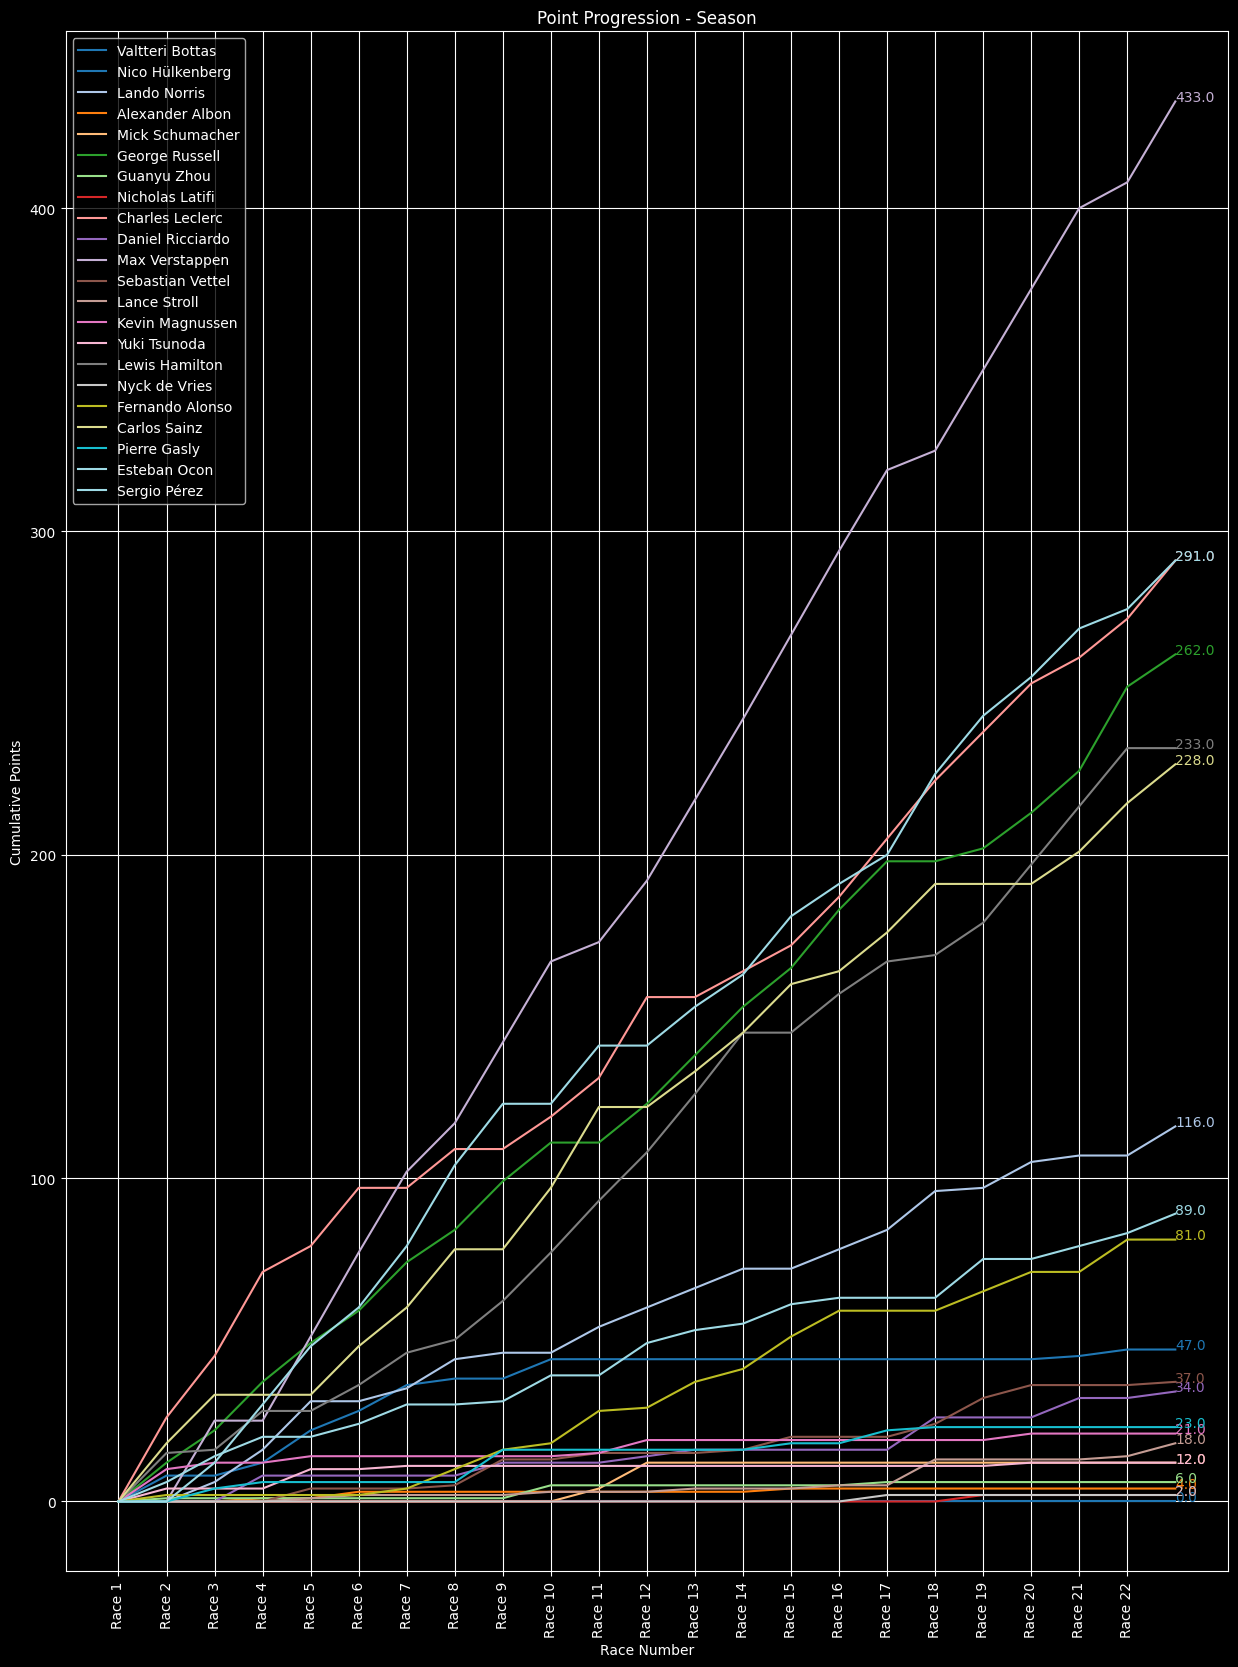

,Driver,Cumulative Points
0,Max Verstappen,433.0
1,Sergio Pérez,291.0
2,Charles Leclerc,291.0
3,George Russell,262.0
4,Lewis Hamilton,233.0
5,Carlos Sainz,228.0
6,Lando Norris,116.0
7,Esteban Ocon,89.0
8,Fernando Alonso,81.0
9,Valtteri Bottas,47.0


In [401]:
import pandas as pd

point_progression = {}

# Collect all driver names
driver_names = set()
for race in grand_prixs:
    race_results_url = f'{ergast_base}/{year}/{race["round"]}/results.json'
    race_results_response = requests.get(race_results_url).json()
    race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
    
    for result in race_results_data:
        driver_name = f"{result['Driver']['givenName']} {result['Driver']['familyName']}"
        driver_names.add(driver_name)

# Initialize point progression for all drivers
for driver_name in driver_names:
    point_progression[driver_name] = [0]  # Start with zero points for all drivers

# Fill in points for each race
for race in grand_prixs:
    race_results_url = f'{ergast_base}/{year}/{race["round"]}/results.json'
    race_results_response = requests.get(race_results_url).json()
    race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
    
    for driver_name in driver_names:
        points = 0
        for result in race_results_data:
            if f"{result['Driver']['givenName']} {result['Driver']['familyName']}" == driver_name:
                points = float(result['points']) if result['points'] is not None else 0
                break
        point_progression[driver_name].append(points)

# Calculate cumulative points for each driver
cumulative_points = {driver: np.cumsum(points) for driver, points in point_progression.items()}

# Create the point progression plot
plt.figure(figsize=(15, 20))
colors = plt.cm.tab20(np.linspace(0, 1, len(cumulative_points)))  # Generate unique colors
for i, (driver, points) in enumerate(cumulative_points.items()):
    plt.plot(points, label=driver, color=colors[i])
    last_point = points[-1]
    plt.annotate(f'{last_point}', (len(points) - 1, last_point), color=colors[i], fontsize=10)

plt.title("Point Progression - Season")
plt.xlabel("Race Number")
plt.ylabel("Cumulative Points")
plt.legend()
plt.grid(True)



# Set x-axis labels as "Race 1", "Race 2", etc.
plt.xticks(range(len(grand_prixs)), [f'Race {i+1}' for i in range(len(grand_prixs))], rotation=90)

plt.show()

# Create a table for point progression
table_data = {'Driver': [], 'Cumulative Points': []}
for driver, points in cumulative_points.items():
    table_data['Driver'].append(driver)
    table_data['Cumulative Points'].append(points[-1])

table_df = pd.DataFrame(table_data)
table_df.sort_values(by='Cumulative Points', ascending=False, inplace=True)
table_df.reset_index(drop=True, inplace=True)

table_df


In [417]:
point_progression = {}

# Collect all driver names
driver_names = set()
for race in grand_prixs:
    race_results_url = f'{ergast_base}/{year}/{race["round"]}/results.json'
    race_results_response = requests.get(race_results_url).json()
    race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']

    for result in race_results_data:
        driver_name = f"{result['Driver']['givenName']} {result['Driver']['familyName']}"
        driver_names.add(driver_name)

# Initialize point progression for all drivers
for driver_name in driver_names:
    point_progression[driver_name] = []

# Fill in points for each race
race_names = []  # List to store the names of the Grand Prix races
for race in grand_prixs:
    race_results_url = f'{ergast_base}/{year}/{race["round"]}/results.json'
    race_results_response = requests.get(race_results_url).json()
    race_results_data = race_results_response['MRData']['RaceTable']['Races'][0]['Results']
    race_name = race_results_response['MRData']['RaceTable']['Races'][0]['raceName']
    race_names.append(race_name)  # Add the race name to the list

    for driver_name in driver_names:
        points = 0
        for result in race_results_data:
            if f"{result['Driver']['givenName']} {result['Driver']['familyName']}" == driver_name:
                points = float(result['points']) if result['points'] is not None else 0
                break
        point_progression[driver_name].append(points)

# Print the data for Charles Leclerc and Sergio Pérez
print("Data for Charles Leclerc:")
print(point_progression["Charles Leclerc"])
print()
print("Data for Sergio Pérez:")
print(point_progression["Sergio Pérez"])


Data for Charles Leclerc:
[26.0, 19.0, 26.0, 8.0, 18.0, 0.0, 12.0, 0.0, 10.0, 12.0, 25.0, 0.0, 8.0, 8.0, 15.0, 18.0, 18.0, 15.0, 15.0, 8.0, 12.0, 18.0]

Data for Sergio Pérez:
[0.0, 12.0, 18.0, 18.0, 12.0, 19.0, 25.0, 19.0, 0.0, 18.0, 0.0, 12.0, 10.0, 18.0, 10.0, 9.0, 25.0, 18.0, 12.0, 15.0, 6.0, 15.0]


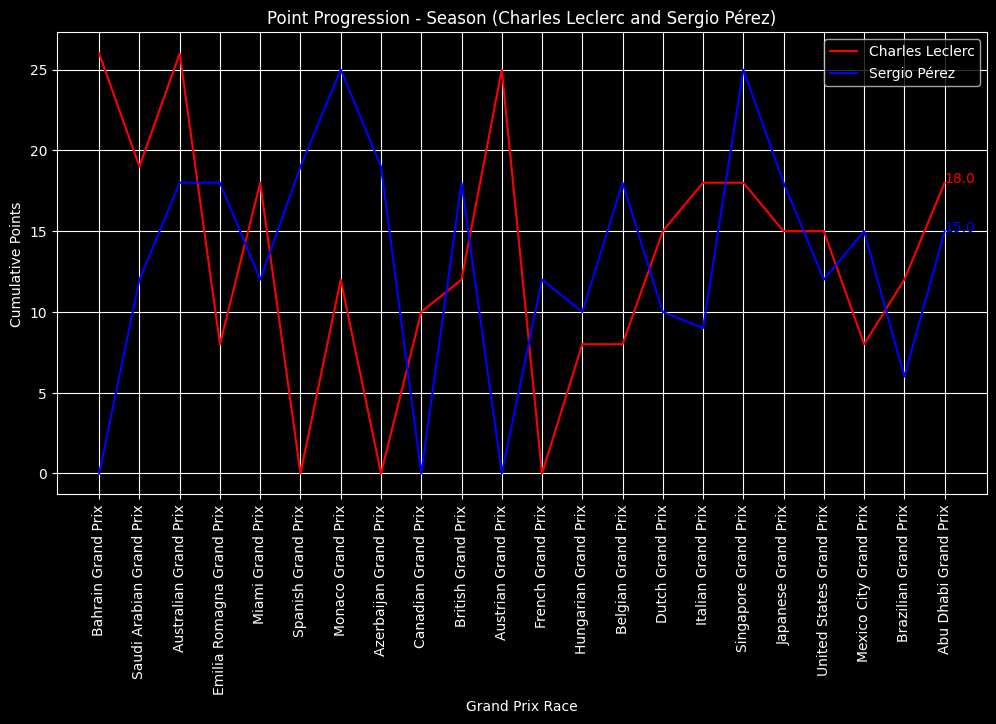

In [418]:
plt.figure(figsize=(12, 6))
colors = ['red', 'blue']
drivers_to_plot = ['Charles Leclerc', 'Sergio Pérez']  # Modified driver names
for i, driver in enumerate(drivers_to_plot):
    points = point_progression[driver]
    plt.plot(points, label=driver, color=colors[i])
    last_point = points[-1]
    plt.annotate(f'{last_point}', (len(points) - 1, last_point), color=colors[i], fontsize=10)

plt.title("Point Progression - Season (Charles Leclerc and Sergio Pérez)")
plt.xlabel("Grand Prix Race")
plt.ylabel("Cumulative Points")
plt.legend()
plt.grid(True)

# Set x-axis labels to Grand Prix race names
plt.xticks(range(len(grand_prixs)), race_names, rotation=90)

plt.show()